# Final Project

Tianjiao Huang

Stella Lau

## Data exploration

We load the labels into a Pandas dataframe and have it describe the data.

In [13]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pathlib

DATA_DIR = "facial_expressions/data"
IMAGE_DIR = "facial_expressions/images"

data = pd.read_csv(f'{DATA_DIR}/legend.csv')
data.describe()


,user.id,image,emotion
count,13690,13690,13690
unique,5,13682,15
top,dwdii,Kimberly_Stewart_0001.jpg,neutral
freq,6667,2,6717


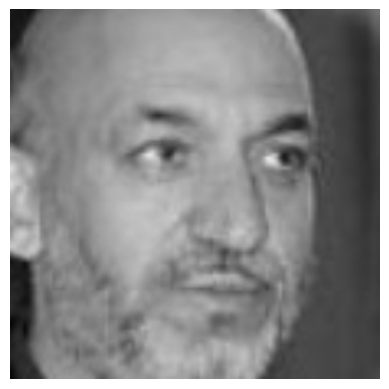

In [11]:
import cv2
import pathlib
image_paths = list(pathlib.Path(IMAGE_DIR).glob('*.jpg'))
image = cv2.imread(str(image_paths[0]))
plt.imshow(image)
plt.axis('off')
plt.show()

## Experiments

## Conclusion